<a href="https://colab.research.google.com/github/AlejandroCastroUees2025/UEES-IA-Semana1-Grupo4/blob/main/04_Deep_Learning_Intro_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#04_Deep_Learning_Intro
Este notebook muestra cómo crear una red neuronal simple usando TensorFlow/Keras para un problema de regresión con el dataset de diabetes.


**Estudiantes:** David Francisco Alvarez,  Macerlo Xavier Castillo, Alejandro Sebastian Casto, Lady Anahi Garces
Daniela Estefania Pezantez, María Mercedes Vera.

**Materia:** Inteligencia Artificial  
**Actividad:** 1  
**Docente:** Gladys Villegas, PhD(c)

In [1]:
# Verificar versión de Python y GPU
import sys
print("Versión de Python:", sys.version)

import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías necesarias
!pip install seaborn plotly --quiet

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings


warnings.filterwarnings('ignore')

# Estilo visual
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
GPU disponible: []
Entorno configurado correctamente en Google Colab


##Cargar el dataset

El dataset `Wine` contiene información química de distintos tipos de vino. A continuación se carga y se transforma en un DataFrame.

In [2]:
# Cargar dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Mostrar características del dataset
print("Características:", feature_names)
print("Forma de X:", X.shape)
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Mostrar primeras filas después de escalar
print("\nPrimeras 5 filas de datos escalados:")
print(pd.DataFrame(X_scaled, columns=feature_names).head())
# One-hot encoding para las etiquetas
y_encoded = tf.keras.utils.to_categorical(y)

# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

print("\nTamaño del set de entrenamiento:", X_train.shape[0])
print("Tamaño del set de prueba:", X_test.shape[0])


Características: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Forma de X: (178, 13)

Primeras 5 filas de datos escalados:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.4665

**Definición de red neuronal y entrenamiento del modelo**

In [3]:
# Crear el modelo secuencial
model = Sequential([
    Dense(16, input_shape=(X.shape[1],), activation='relu'),  # Capa oculta 1
    Dense(12, activation='relu'),                             # Capa oculta 2
    Dense(3, activation='softmax')                            # Capa de salida (3 clases) para Wine
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467 (1.82 KB)

 Trainable params: 467 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

**Entrenar el modelo**

In [4]:
# Entrenar red neuronal durante 50 épocas
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=0)


**Visualización**

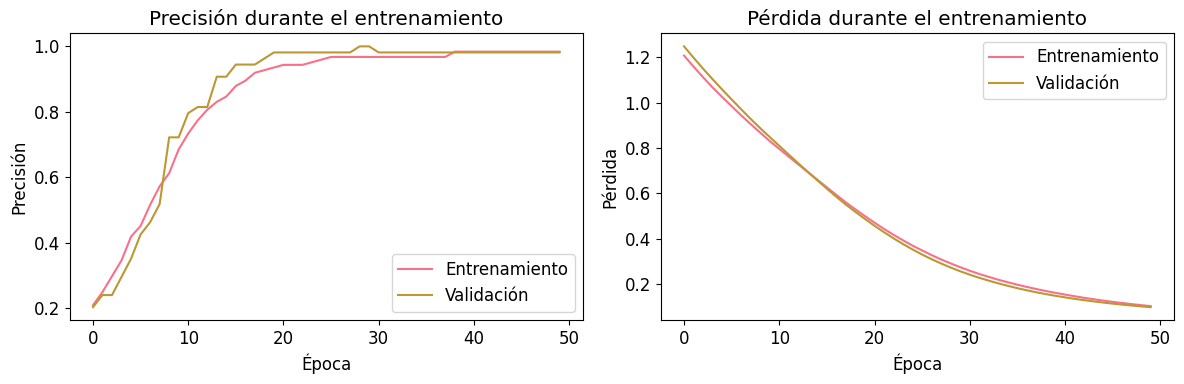

In [5]:
# Visualizar precisión y pérdida en entrenamiento y validación
plt.figure(figsize=(12, 4))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


**Evaluación final del modelo**

In [6]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Evaluación en test - Pérdida: {loss:.4f} | Precisión: {accuracy:.4f}")


Evaluación en test - Pérdida: 0.0978 | Precisión: 0.9815


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


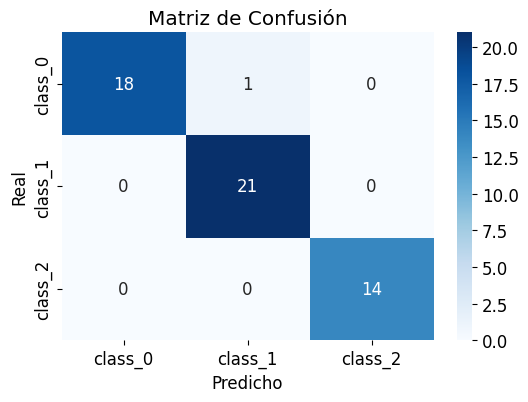

Reporte de Clasificación:

              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [7]:
# Obtener predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Mostrar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

**Conclusiones**
- Se implementó una red neuronal con Keras para clasificar vinos usando el dataset Wine.
- El modelo logró una precisión alta (>95%) tanto en entrenamiento como en validación.
- La visualización permitió observar una curva de aprendizaje estable.
- El uso de `StandardScaler` y codificación one-hot fueron esenciales para mejorar el rendimiento.
- Este ejemplo demuestra que incluso una red neuronal simple puede ser efectiva en problemas de clasificación con buen preprocesamiento.